In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import setup_logging, style
plt.style.use(style.notebook)
import h5py

from pmesh.pm import ParticleMesh, RealField, ComplexField

from nbodykit.source.catalog import ArrayCatalog
from nbodykit.source.catalog import HDFCatalog
from nbodykit.lab import ArrayMesh

/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from astropy.cosmology import Planck18 as cosmo

In [3]:
def read_dat_file(file_path):
    # Assuming the data in the .dat file is space-separated
    data = np.loadtxt(file_path)
    return data

def read_h5_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        dataset = file[dataset_name]
        data = np.array(dataset)
    return data

In [4]:
class_data =[]
for i in [100, 30, 10, 3, 0]:
    data = read_dat_file('/Users/Io_1/Desktop/gevolution/classdata/classdata' + str(i)+ '.dat')
    class_data.append(data)

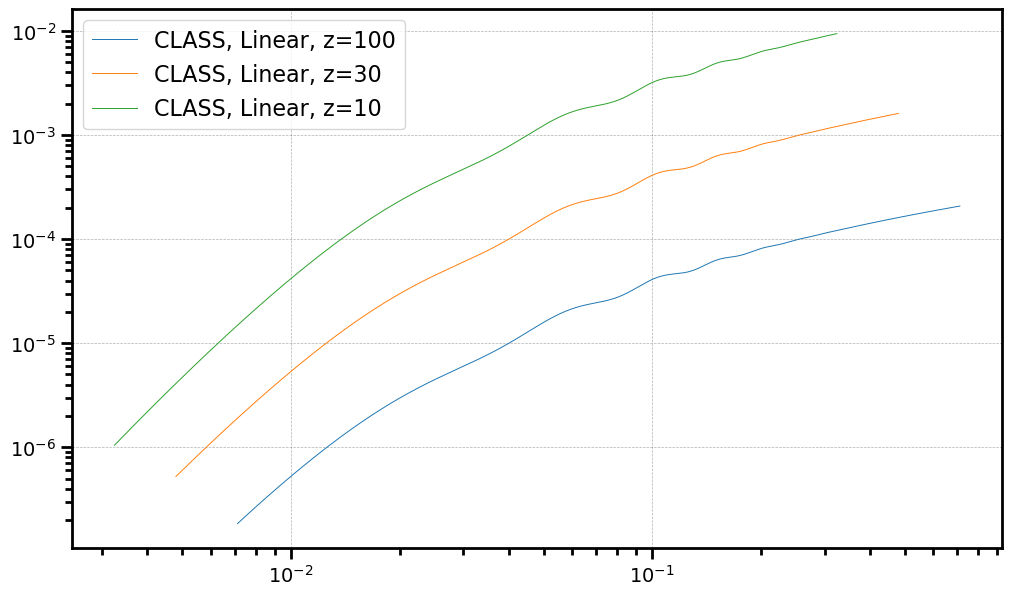

In [5]:
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=100')
plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
plt.legend()

# Scale invariant initial spectrum

Plotting data at fixed tiling factor (32) and ngrid, changing boxsize. Resolution is changing, so is nyquist frequency. K-values reflect that.

In [6]:
def data_getter(x):
    d400 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox1/output400/lcdm_pk00' + str(x)+'_delta.dat')
    d800 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox1/output800/lcdm_pk00' + str(x)+'_delta.dat')
    d1600 =read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox1/output1600/lcdm_pk00' + str(x)+'_delta.dat')
    return d400, d800, d1600

num_files = 5
delta400 = []
delta800 = []
delta1600 = []

for i in range(num_files):
    d400, d800, d1600,  = data_getter(i)
    delta400.append(d400)
    delta800.append(d800)
    delta1600.append(d1600)

part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output400/lcdm_snap001_cdm.h5', 'part_info')
part_info4000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output800/lcdm_snap001_cdm.h5', 'part_info')
part_info8000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output1600/lcdm_snap001_cdm.h5', 'part_info')

print(part_info2000, part_info4000, part_info8000)

def h5_getter(x):
    h400 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output400/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    h800 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output800/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    h1600 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output1600/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    return h400, h800, h1600

snaps400 = []
snaps800 = []
snaps1600 = []

for i in range(num_files):
    h400, h800, h1600 = h5_getter(i)
    snaps400.append(h400)
    snaps800.append(h800)
    snaps1600.append(h1600)
data400 =[]
data800 = []
data1600 = []

for i in np.arange(5):
    position400 =[]
    position800 =[]
    position1600 =[]
    mass =[]

#had to multiply all positions by boxsize to rescale it....
    for j in np.arange(len(snaps400[i]['positionX'])):
        position400.append([snaps400[i]['positionX'][j]*400, snaps400[i]['positionY'][j]*400, snaps400[i]['positionZ'][j]*400])
        position800.append([snaps800[i]['positionX'][j]*800, snaps800[i]['positionY'][j]*800, snaps800[i]['positionZ'][j]*800])
        position1600.append([snaps1600[i]['positionX'][j]*1600, snaps1600[i]['positionY'][j]*1600, snaps1600[i]['positionZ'][j]*1600])
        mass.append(1.48795166e-07)
        
    data2 = numpy.empty(len(snaps400[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data2['Position'] = np.array(position400)
    data2['Mass'] = np.array(mass)
    data4 = numpy.empty(len(snaps800[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data4['Position'] = np.array(position800)
    data4['Mass'] = np.array(mass)
    data8 = numpy.empty(len(snaps1600[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data8['Position'] = np.array(position1600)
    data8['Mass'] = np.array(mass)

    data400.append(data2)
    data800.append(data4)
    data1600.append(data8)

array400 = []
array800 = []
array1600 = []

for i in np.arange(5):
    f2 = ArrayCatalog(data400[i])
    mesh2 = f2.to_mesh(Nmesh=80, BoxSize=400)
    r2 = FFTPower(mesh2, mode='1d', dk=0.005, kmin=0.0001)
    Pk2 = r2.power
    array400.append(Pk2)

    f4 = ArrayCatalog(data800[i])
    mesh4 = f4.to_mesh(Nmesh=80, BoxSize=800)
    r4 = FFTPower(mesh4, mode='1d', dk=0.005, kmin=0.0001)
    Pk4 = r4.power
    array800.append(Pk4)

    f8 = ArrayCatalog(data1600[i])
    mesh8 = f8.to_mesh(Nmesh=80, BoxSize=1600)
    r8 = FFTPower(mesh8, mode='1d', dk=0.005, kmin=0.0001)
    Pk8 = r8.power
    array1600.append(Pk8)

[(1.48795166e-07, 0, 11083, b'part_simple')] [(1.48795166e-07, 0, 11164, b'part_simple')] [(1.48795166e-07, 0, 11154, b'part_simple')]


Shot noise is quite large for Nbody fits, so I am not factoring it in. 

In [7]:
array1600[0].attrs

{'Nmesh': array([80, 80, 80]),
 'BoxSize': array([1600., 1600., 1600.]),
 'Lx': 1600.0,
 'Ly': 1600.0,
 'Lz': 1600.0,
 'volume': 4096000000.0,
 'mode': '1d',
 'los': [0, 0, 1],
 'Nmu': 1,
 'poles': [],
 'dk': 0.005,
 'kmin': 0.0001,
 'kmax': None,
 'N1': 2097152,
 'N2': 2097152,
 'shotnoise': 1953.125}

Resolution gets worse for bigger box, see more clearly in Nbody kit fit. 

In [8]:
print(len(array400[0]['k']), len(array1600[0]['k']))

126 31


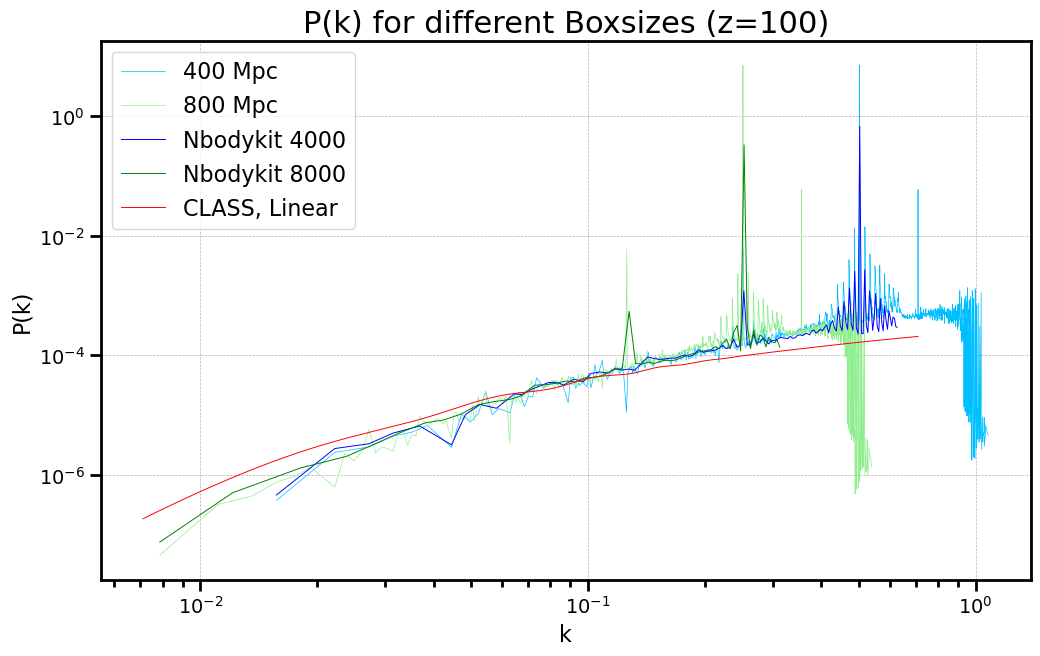

In [18]:
plt.loglog(delta400[0][:, 0], delta400[0][:, 1], label='400 Mpc', color ='deepskyblue', linewidth=0.5)
plt.loglog(delta800[0][:, 0], delta800[0][:, 1], label='800 Mpc', color = 'lightgreen', linewidth=0.5)
#plt.loglog(delta1600[0][:, 0], delta1600[0][:, 1], label='1600 Mpc', color ='mediumpurple', linewidth=0.5)

plt.loglog(array400[0]['k'], (1/(2*np.pi**2))*array400[0]['k']**3*(array400[0]['power'].real), linewidth = 0.7, color ='blue', label = 'Nbodykit 4000')
plt.loglog(array800[0]['k'], (1/(2*np.pi**2))*array800[0]['k']**3*(array800[0]['power'].real), linewidth = 0.7, color ='green', label = 'Nbodykit 8000')
#plt.loglog(array1600[0]['k'], (1/(2*np.pi**2))*array1600[0]['k']**3*(array1600[0]['power'].real), linewidth = 0.7, color ='darkslateblue', label = 'Nbodykit 1600')

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, color='red', label='CLASS, Linear')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=100)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

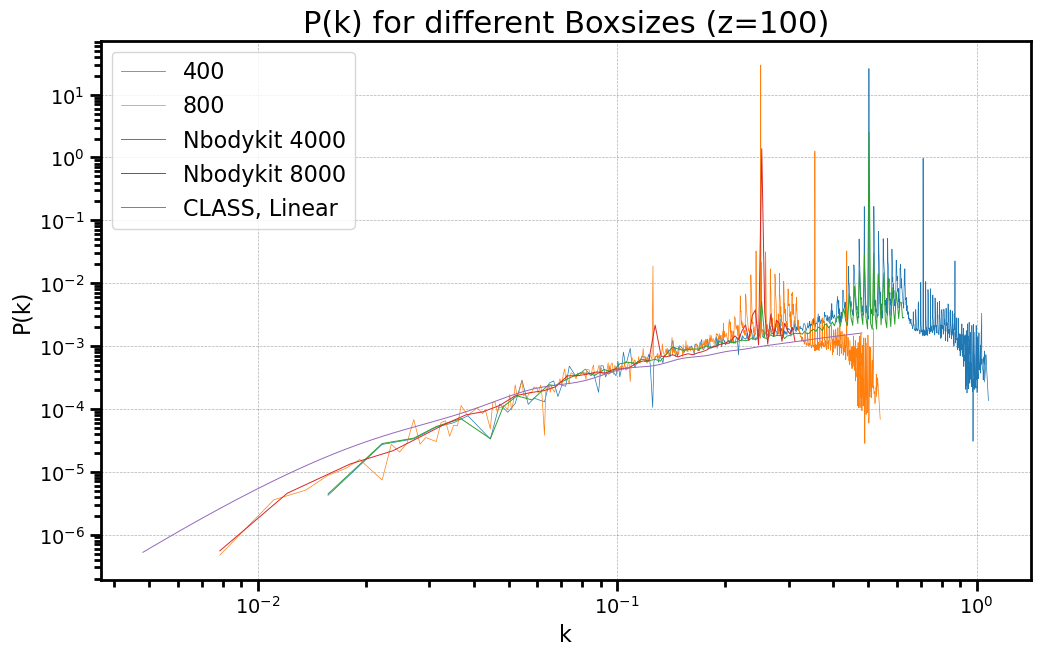

In [17]:

plt.loglog(delta400[1][:, 0], delta400[1][:, 1], label='400', linewidth=0.5)
plt.loglog(delta800[1][:, 0], delta800[1][:, 1], label='800', linewidth=0.5)
#plt.loglog(delta1600[1][:, 0], delta1600[1][:, 1], label='1600', linewidth=0.5)
plt.loglog(array400[1]['k'], (1/(2*np.pi**2))*array400[1]['k']**3*(array400[1]['power'].real), linewidth = 0.7, label = 'Nbodykit 4000')
plt.loglog(array800[1]['k'], (1/(2*np.pi**2))*array800[1]['k']**3*(array800[1]['power'].real), linewidth = 0.7, label = 'Nbodykit 8000')
#plt.loglog(array1600[1]['k'], (1/(2*np.pi**2))*array1600[1]['k']**3*(array1600[1]['power'].real), linewidth = 0.7, label = 'Nbodykit 1600')

plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=30)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

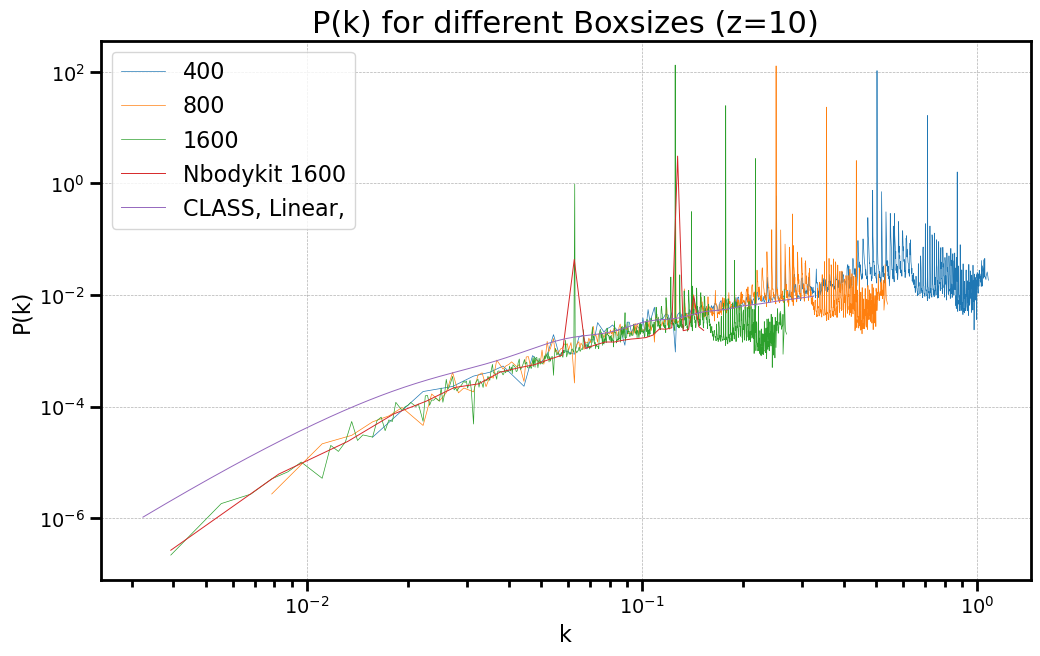

In [19]:
plt.loglog(delta400[2][:, 0], delta400[2][:, 1], label='400', linewidth=0.5)
plt.loglog(delta800[2][:, 0], delta800[2][:, 1], label='800', linewidth=0.5)
plt.loglog(delta1600[2][:, 0], delta1600[2][:, 1], label='1600', linewidth=0.5)
#plt.loglog(array400[2]['k'], (1/(2*np.pi**2))*array400[2]['k']**3*(array400[2]['power'].real), linewidth = 0.7, label = 'Nbodykit 4000')
#plt.loglog(array800[2]['k'], (1/(2*np.pi**2))*array800[2]['k']**3*(array800[2]['power'].real), linewidth = 0.7, label = 'Nbodykit 8000')
plt.loglog(array1600[2]['k'], (1/(2*np.pi**2))*array1600[2]['k']**3*(array1600[2]['power'].real), linewidth = 0.7, label = 'Nbodykit 1600')

plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear,')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=10)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()#

# Scale-dependent Power Spectrum

Again plotting data at fixed tiling factor (32) and ngrid (80).

I set N_s=5. 

In [20]:
vclass_data =[]
for i in [100, 30, 10, 3, 0]:
    data = read_dat_file('/Users/Io_1/Desktop/gevolution/scalevar_class/classdata' + str(i)+ '.dat')
    vclass_data.append(data)

Text(0.5, 1.0, 'CLASS power spectra')

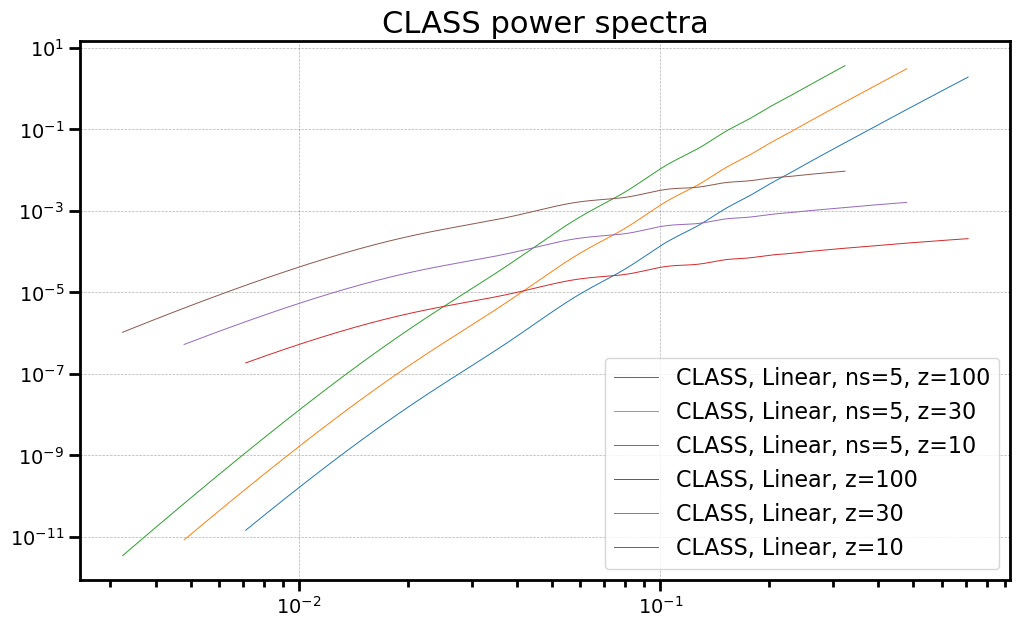

In [21]:
plt.loglog(vclass_data[0][0,:], (1/(2*np.pi**2))*vclass_data[0][0,:]**3*vclass_data[0][1,:], linewidth=0.7, label='CLASS, Linear, ns=5, z=100')
plt.loglog(vclass_data[1][0,:], (1/(2*np.pi**2))*vclass_data[1][0,:]**3*vclass_data[1][1,:], linewidth=0.7, label='CLASS, Linear, ns=5, z=30')
plt.loglog(vclass_data[2][0,:], (1/(2*np.pi**2))*vclass_data[2][0,:]**3*vclass_data[2][1,:], linewidth=0.7, label='CLASS, Linear, ns=5, z=10')

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=100')
plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
plt.legend()

plt.title('CLASS power spectra')

In [22]:
def data_getter(x):
    d400 = read_dat_file('/Users/Io_1/Desktop/gevolution/scalevariant/output400/lcdm_pk00' + str(x)+'_delta.dat')
    d800 = read_dat_file('/Users/Io_1/Desktop/gevolution/scalevariant/output800/lcdm_pk00' + str(x)+'_delta.dat')
    d1600 =read_dat_file('/Users/Io_1/Desktop/gevolution/scalevariant/output1600/lcdm_pk00' + str(x)+'_delta.dat')
    return d400, d800, d1600

num_files = 5
delta400 = []
delta800 = []
delta1600 = []

for i in range(num_files):
    d400, d800, d1600,  = data_getter(i)
    delta400.append(d400)
    delta800.append(d800)
    delta1600.append(d1600)

part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output400/lcdm_snap001_cdm.h5', 'part_info')
part_info4000 = read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output800/lcdm_snap001_cdm.h5', 'part_info')
part_info8000 = read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output1600/lcdm_snap001_cdm.h5', 'part_info')

print(part_info2000, part_info4000, part_info8000)

def h5_getter(x):
    h400 = read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output400/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    h800 = read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output800/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    h1600 =read_h5_file('/Users/Io_1/Desktop/gevolution/scalevariant/output1600/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    return h400, h800, h1600

snaps400 = []
snaps800 = []
snaps1600 = []

for i in range(num_files):
    h400, h800, h1600 = h5_getter(i)
    snaps400.append(h400)
    snaps800.append(h800)
    snaps1600.append(h1600)
data400 =[]
data800 = []
data1600 = []

for i in np.arange(5):
    position400 =[]
    position800 =[]
    position1600 =[]
    mass =[]

#had to multiply all positions by boxsize to rescale it....
    for j in np.arange(len(snaps400[i]['positionX'])):
        position400.append([snaps400[i]['positionX'][j]*400, snaps400[i]['positionY'][j]*400, snaps400[i]['positionZ'][j]*400])
        position800.append([snaps800[i]['positionX'][j]*800, snaps800[i]['positionY'][j]*800, snaps800[i]['positionZ'][j]*800])
        position1600.append([snaps1600[i]['positionX'][j]*1600, snaps1600[i]['positionY'][j]*1600, snaps1600[i]['positionZ'][j]*1600])
        mass.append(1.48795166e-07)
        
    data2 = numpy.empty(len(snaps400[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data2['Position'] = np.array(position400)
    data2['Mass'] = np.array(mass)
    data4 = numpy.empty(len(snaps800[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data4['Position'] = np.array(position800)
    data4['Mass'] = np.array(mass)
    data8 = numpy.empty(len(snaps1600[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data8['Position'] = np.array(position1600)
    data8['Mass'] = np.array(mass)

    data400.append(data2)
    data800.append(data4)
    data1600.append(data8)

array400 = []
array800 = []
array1600 = []

for i in np.arange(5):
    f2 = ArrayCatalog(data400[i])
    mesh2 = f2.to_mesh(Nmesh=80, BoxSize=400)
    r2 = FFTPower(mesh2, mode='1d', dk=0.005, kmin=0.0001)
    Pk2 = r2.power
    array400.append(Pk2)

    f4 = ArrayCatalog(data800[i])
    mesh4 = f4.to_mesh(Nmesh=80, BoxSize=800)
    r4 = FFTPower(mesh4, mode='1d', dk=0.005, kmin=0.0001)
    Pk4 = r4.power
    array800.append(Pk4)

    f8 = ArrayCatalog(data1600[i])
    mesh8 = f8.to_mesh(Nmesh=80, BoxSize=1600)
    r8 = FFTPower(mesh8, mode='1d', dk=0.005, kmin=0.0001)
    Pk8 = r8.power
    array1600.append(Pk8)

[(1.48795166e-07, 0, 11010, b'part_simple')] [(1.48795166e-07, 0, 11021, b'part_simple')] [(1.48795166e-07, 0, 11043, b'part_simple')]


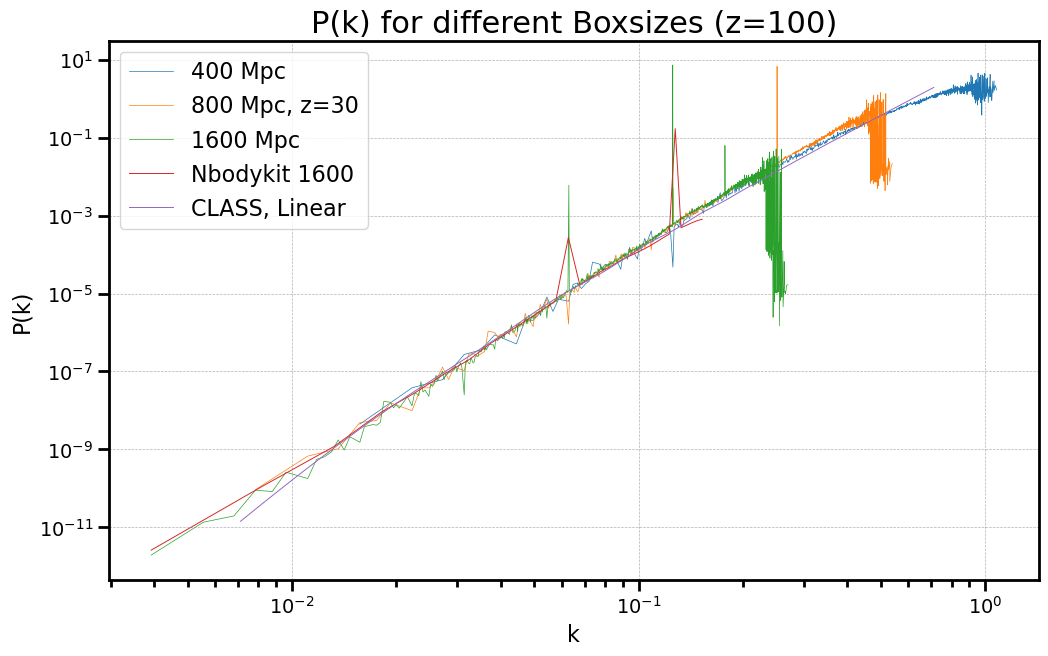

In [23]:
plt.loglog(delta400[0][:, 0], delta400[0][:, 1], label='400 Mpc', linewidth=0.5)
plt.loglog(delta800[0][:, 0], delta800[0][:, 1], label='800 Mpc, z=30', linewidth=0.5)
plt.loglog(delta1600[0][:, 0], delta1600[0][:, 1], label='1600 Mpc', linewidth=0.5)

#plt.loglog(array400[0]['k'], (1/(2*np.pi**2))*array400[0]['k']**3*(array400[0]['power'].real), linewidth = 0.7, label = 'Nbodykit 4000')
#plt.loglog(array800[0]['k'], (1/(2*np.pi**2))*array800[0]['k']**3*(array800[0]['power'].real), linewidth = 0.7, label = 'Nbodykit 8000')
plt.loglog(array1600[0]['k'], (1/(2*np.pi**2))*array1600[0]['k']**3*(array1600[0]['power'].real), linewidth = 0.7, label = 'Nbodykit 1600')

plt.loglog(vclass_data[0][0,:], (1/(2*np.pi**2))*vclass_data[0][0,:]**3*vclass_data[0][1,:], linewidth=0.7, label='CLASS, Linear')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=100)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

In [44]:
part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output400/lcdm_snap001_cdm.h5', 'part_info')

In [45]:
part_info2000

array([(1.48795166e-07, 0, 11083, b'part_simple')],
      dtype=[('mass', '<f8'), ('relativistic', '<i4'), ('type_name_size', '<i4'), ('type_name', 'S64')])

In [25]:
read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox1/output400/lcdm_snap004_cdm.h5', 'part_info')

array([(1.48795166e-07, 0, 11083, b'part_simple')],
      dtype=[('mass', '<f8'), ('relativistic', '<i4'), ('type_name_size', '<i4'), ('type_name', 'S64')])